# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Manifold-Learning" data-toc-modified-id="Manifold-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Manifold Learning</a></div><div class="lev1 toc-item"><a href="#Manifold-learning-on-the-digits-data" data-toc-modified-id="Manifold-learning-on-the-digits-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Manifold learning on the digits data</a></div>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Manifold Learning

One weakness of PCA is that it cannot detect non-linear features.  A set
of algorithms known as *Manifold Learning* have been developed to address
this deficiency.  A canonical dataset used in Manifold learning is the
*S-curve*:

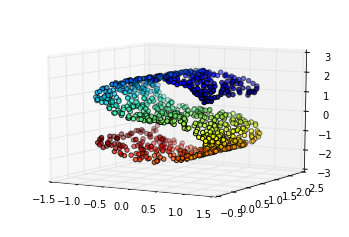

In [2]:
from sklearn.datasets import make_s_curve
X, y = make_s_curve(n_samples=1000)

from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.view_init(10, -60);

This is a 2-dimensional dataset embedded in three dimensions, but it is embedded
in such a way that PCA cannot discover the underlying data orientation:

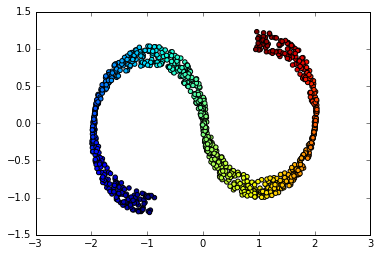

In [3]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y);

Manifold learning algorithms, however, available in the ``sklearn.manifold``
submodule, are able to recover the underlying 2-dimensional manifold:

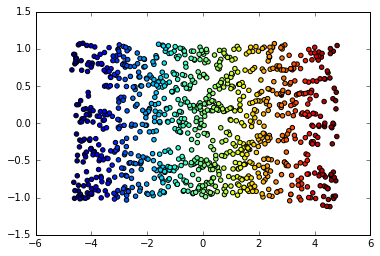

In [4]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=15, n_components=2)
X_iso = iso.fit_transform(X)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y);

## Manifold learning on the digits data

We can apply manifold learning techniques to much higher dimensional datasets, for example the digits data that we saw before:

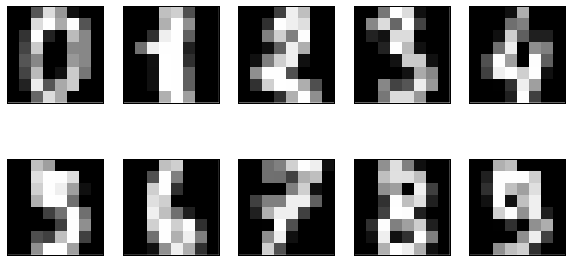

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img, interpolation="none", cmap="gray")

We can visualize the dataset using a linear technique, such as PCA. We saw this already provides some intuition about the data:

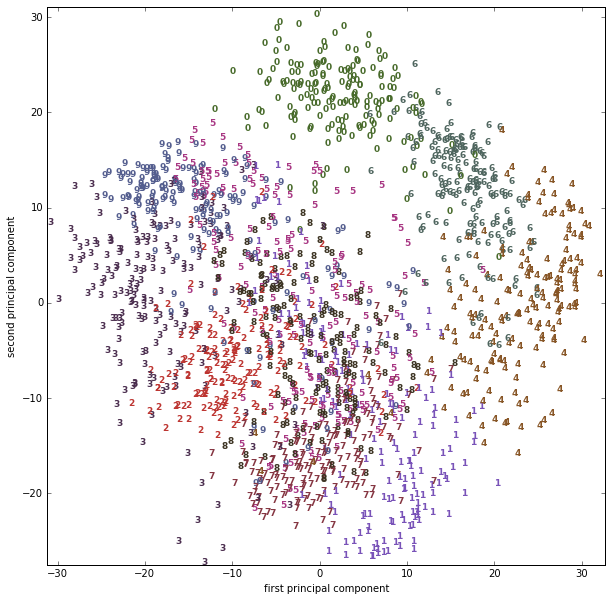

In [6]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max() + 1)
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("first principal component")
plt.ylabel("second principal component");

Using a more powerful, nonlinear techinque can provide much better visualizations, though.
Here, we are using the t-SNE manifold learning method:

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method:
digits_tsne = tsne.fit_transform(digits.data)

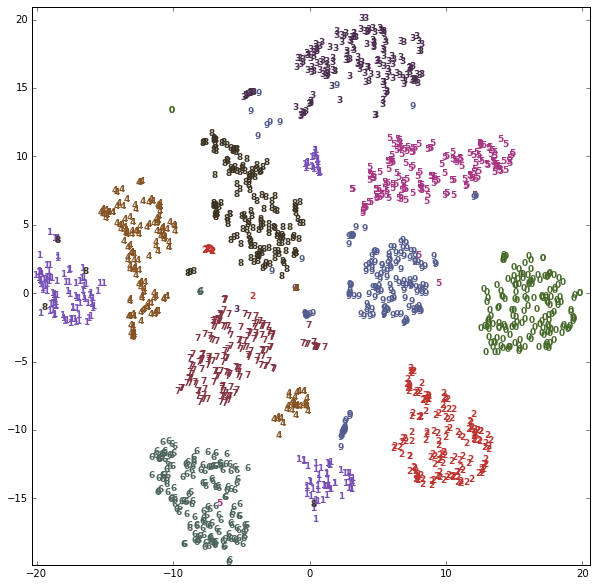

In [8]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})

t-SNE has a somewhat longer runtime that other manifold learning algorithms, but the result is quite striking. Keep in mind that this algorithm is purely unsupervised, and does not know about the class labels. Still it is able to separate the classes very well (though the classes four, one and nine have been split into multiple groups).

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Compare the results of applying isomap to the digits dataset to the results of PCA and t-SNE. Which result do you think looks best?
      </li>
      <li>
      Given how well t-SNE separated the classes, one might be tempted to use this processing for classification. Try training a K-nearest neighbor classifier on digits data transformed with t-SNE, and compare to the accuracy on using the dataset without any transformation.
      </li>
    </ul>
</div>

In [9]:
# %load solutions/21A_isomap_digits.py

In [10]:
# %load solutions/21B_tsne_classification.py